In [1]:
# !pip install pandas
# !pip install numpy
# !pip install seaborn
# !pip install tensorflow


In [2]:
# pip install tensorflow
# !pip install keras==2.12.0
# !pip install --upgrade keras tensorflow
# !pip install scikeras

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from time import time
import random
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score as f1_score_rep
from sklearn.metrics import accuracy_score

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

/tmp/ipykernel_565/3026721098.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-02-12 04:15:37.572421: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-12 04:15:37.611247: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-12 04:15:37.611314: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin c

In [4]:
x_test = np.load('/home/jovyan/MQTTset/x_test.npy')
x_train = np.load('/home/jovyan/MQTTset/x_train.npy')
x_val = np.load('/home/jovyan/MQTTset/x_val.npy')
y_test = np.load('/home/jovyan/MQTTset/y_test.npy')
y_train = np.load('/home/jovyan/MQTTset/y_train.npy')
y_val = np.load('/home/jovyan/MQTTset/y_val.npy')

In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], 1)

input_shape = x_train.shape[1:]

num_classes = len(np.unique(y_train))

cnn_model = Sequential()
cnn_model.add(Conv1D(filters=20, kernel_size=4, strides=2, padding='valid', activation='relu', input_shape=input_shape))
cnn_model.add(MaxPooling1D())
cnn_model.add(Conv1D(filters=20, kernel_size=4, strides=2, padding='same', activation='relu'))
cnn_model.add(Conv1D(filters=3, kernel_size=2, strides=1, padding='same', activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(units=100, activation='relu'))
cnn_model.add(Dense(units=num_classes, activation='softmax'))

opt = SGD(learning_rate=0.01) 

cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)
hist = cnn_model.fit(x_train, y_train, epochs=1, batch_size=128,
                     validation_data=(x_val, y_val), 
                     callbacks=[early_stopping])

test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

y_hat = cnn_model.predict(x_test)
y_hat = np.argmax(y_hat, axis=-1)

2024-02-12 04:16:41.021904: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


113262/113262 [==============================] - 70s 620us/step - loss: 0.0393 - accuracy: 0.9940
Test accuracy: 0.9939860105514526
113262/113262 [==============================] - 63s 556us/step


In [6]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from scikeras.wrappers import KerasClassifier
# from tensorflow.keras.optimizers import SGD
# from sklearn.experimental import enable_halving_search_cv
# from sklearn.model_selection import HalvingGridSearchCV
# import numpy as np

# # 定义模型创建函数
# def create_model(filters=20, kernel_size=4):
#     model = Sequential()
#     model.add(Conv1D(filters=filters, kernel_size=kernel_size, strides=2, padding='valid', activation='relu', input_shape=input_shape))
#     model.add(MaxPooling1D())
#     model.add(Conv1D(filters=filters, kernel_size=kernel_size, strides=2, padding='same', activation='relu'))
#     model.add(Conv1D(filters=3, kernel_size=2, strides=1, padding='same', activation='relu'))
#     model.add(Flatten())
#     model.add(Dense(units=100, activation='relu'))
#     model.add(Dense(units=num_classes, activation='softmax'))
#     model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01), metrics=['accuracy'])

#     return model

# # 确保输入数据已经准备好
# # x_train, y_train, x_val, y_val, x_test, y_test

# input_shape = x_train.shape[1:]
# num_classes = len(np.unique(y_train))

# # 使用KerasClassifier包装模型
# model = KerasClassifier(build_fn=create_model, filters= [20, 40], kernel_size= [3, 5], epochs=10, batch_size=64, verbose=1)

# # 定义参数网格
# param_grid = {
#     'filters': [20, 40],
#     'kernel_size': [3, 5]
# }

# # 创建 HalvingGridSearchCV 实例
# halving_grid = HalvingGridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)

# # 执行搜索
# halving_grid.fit(x_train, y_train, validation_data=(x_val, y_val))

# # 输出最佳参数和相应的准确率
# print("Best parameters:", halving_grid.best_params_)
# print("Best accuracy:", halving_grid.best_score_)

# # 评估测试集上的性能
# best_model = halving_grid.best_estimator_.model
# test_loss, test_acc = best_model.evaluate(x_test, y_test)
# print('Test accuracy:', test_acc)

113262/113262 [==============================] - 63s 555us/step
FPR: [0.         0.         0.         0.43900425 0.         0.        ]
TPR: [0.         0.71279781 0.         1.         0.         0.        ]
FNR: [1.         0.28720219 1.         0.         1.         1.        ]
TNR: [1.         1.         1.         0.56099575 1.         1.        ]
Precision: 0.33232323428922245
Accuracy: 0.9939859826518624
F1-score: 0.992276770316092
AUC: 0.7974766402586339
FPR: 0.07316737494377422
tpr: 0.28546630157552183
fnr: 0.7145336984244782
tnr: 0.9268326250562259


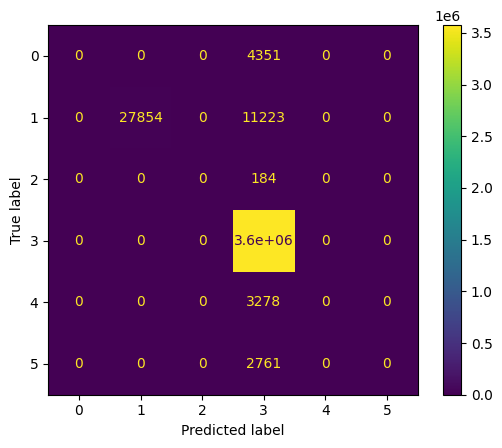

In [7]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score



conf_matrix = confusion_matrix(y_test, y_hat)
# tn, fp, fn, tp = conf_matrix.ravel()
cm = conf_matrix
fp = cm.sum(axis=0) - np.diag(cm)
fn = cm.sum(axis=1) - np.diag(cm)
tp = np.diag(cm)
tn = cm.sum() - (fp + fn + tp)


fpr = fp / (fp + tn)
tpr = tp / (tp + fn)
fnr = fn / (fn + tp)
tnr = tn / (tn + fp)
precision = precision_score(y_test, y_hat, average='macro')
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='weighted')
auc = roc_auc_score(y_test, cnn_model.predict(x_test), multi_class='ovr')

print(f"FPR: {fpr}")
print(f"TPR: {tpr}")
print(f"FNR: {fnr}")
print(f"TNR: {tnr}")
print(f"Precision: {precision}")
print(f"Accuracy: {accuracy}")
print(f"F1-score: {f1}")
print(f"AUC: {auc}")

print(f"FPR: {np.mean(fpr)}")
print(f"tpr: {np.mean(tpr)}")
print(f"fnr: {np.mean(fnr)}")
print(f"tnr: {np.mean(tnr)}")

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.show()

import pandas as pd
metrics = {
    "model" : "cnn",
    "Accuracy": accuracy,
    "Precision": precision,
    "F1-score": f1,
    "FPR": np.mean(fpr),
    "TPR": np.mean(tpr),
    "FNR": np.mean(fnr),
    "TNR": np.mean(tnr),
    "AUC": auc
}
metrics_df = pd.DataFrame([metrics])
metrics_df.to_csv("/home/jovyan/MQTTset/model.csv", mode='a', index=False)